In [64]:
import sys
from pathlib import Path

project_root = Path.cwd()
if not (project_root / "configs" / "app.yaml").exists():
    project_root = Path.cwd().parent 
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# Imports projet (après ajout du path)
from src.utils.config import load_config
from src.data.load import load_dataset, ensure_dirs

cfg = load_config()
ensure_dirs(cfg)
cfg["abs_paths"]


{'data_raw_dir': 'C:\\stutent_exam_score_predict\\data\\raw',
 'data_processed_dir': 'C:\\stutent_exam_score_predict\\data\\processed',
 'models_dir': 'C:\\stutent_exam_score_predict\\models',
 'dataset': 'C:\\stutent_exam_score_predict\\data\\raw\\student_habits_performance.csv'}

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style = "whitegrid")
import warnings
warnings.filterwarnings('ignore')


In [66]:
df = load_dataset(cfg)
display(df.head())

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [67]:
df.sample(5)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
100,S1100,23,Male,4.3,3.0,1.5,No,100.0,7.5,Good,5,NaN,Average,10,Yes,93.2
647,S1647,17,Female,4.3,1.5,0.0,No,88.9,4.6,Poor,6,NaN,Average,4,No,84.2
113,S1113,22,Male,3.0,2.5,2.6,No,83.1,5.5,Fair,0,Bachelor,Average,4,No,51.3
877,S1877,18,Female,2.7,2.7,1.6,No,76.6,4.0,Good,0,High School,Average,3,No,36.9
952,S1952,21,Female,3.6,2.1,3.5,Yes,62.3,5.7,Poor,1,High School,Average,9,No,65.6


In [68]:
print("Shape:", df.shape)

Shape: (1000, 16)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [70]:
df.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [71]:
df = df.dropna()

In [72]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [73]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [76]:
df.describe(include='object')

,student_id,gender,part_time_job,diet_quality,parental_education_level,internet_quality,extracurricular_participation
count,909,909,909,909,909,909,909
unique,909,3,2,3,3,3,2
top,S1000,Male,No,Fair,High School,Good,No
freq,1,440,713,396,392,410,620


In [77]:
categorical_cols = df.select_dtypes(include='object').columns

In [78]:
categorical_cols

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [79]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']

In [80]:
for col in categorical_cols :
    print(f'value count for {col}: \n {df[col].value_counts()}')

value count for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
value count for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
value count for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
value count for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
value count for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
value count for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


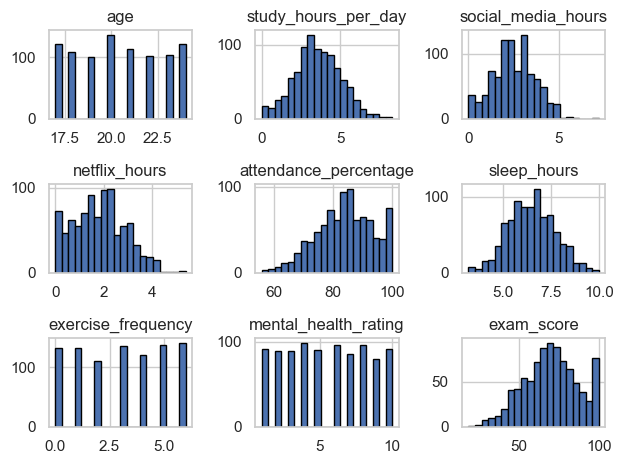

In [81]:
df.hist(bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

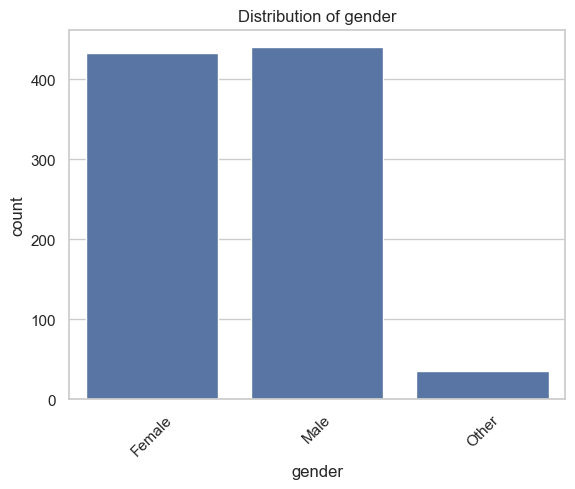

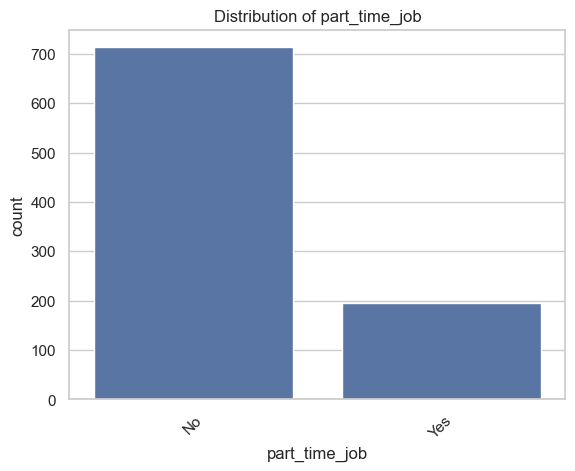

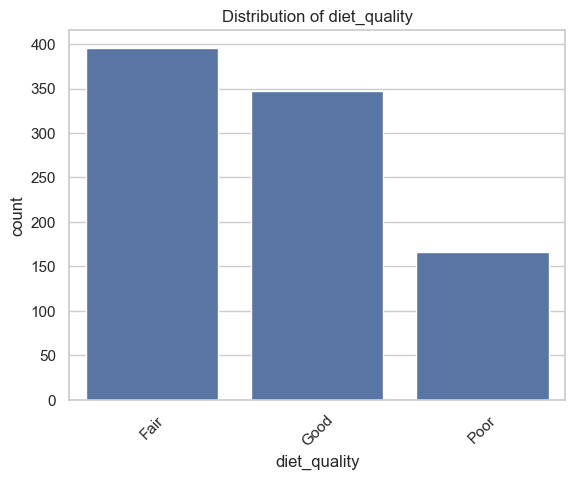

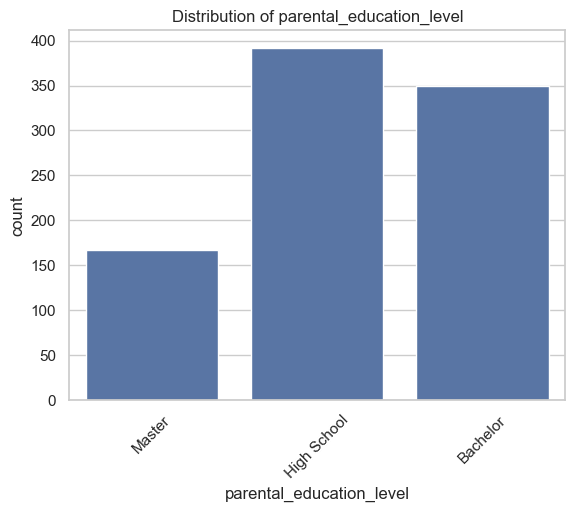

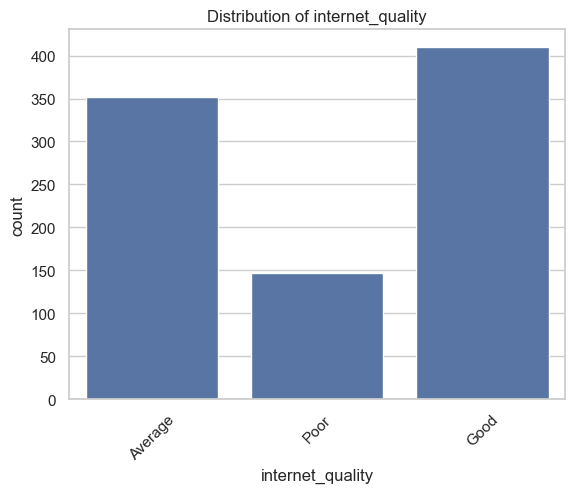

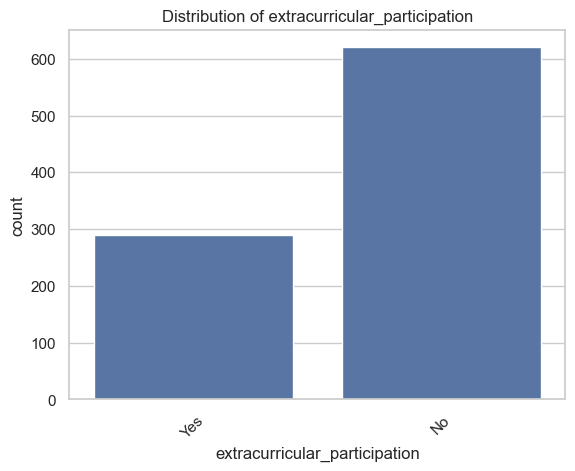

In [82]:
for col in categorical_cols:
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

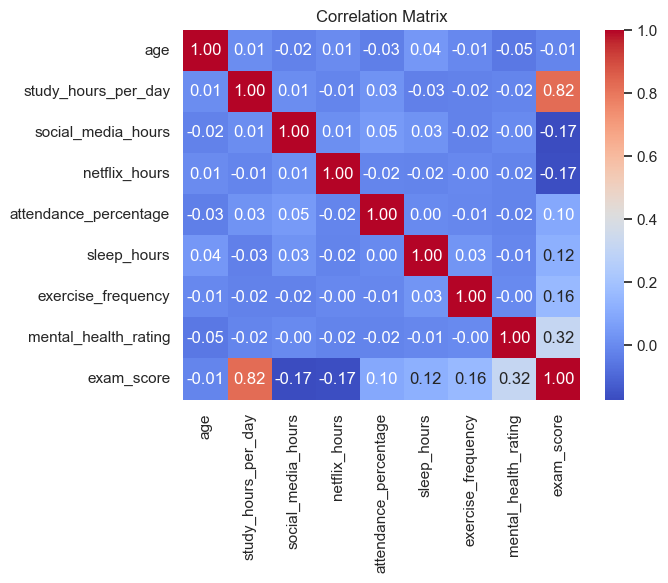

In [83]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [84]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [85]:
num_features = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

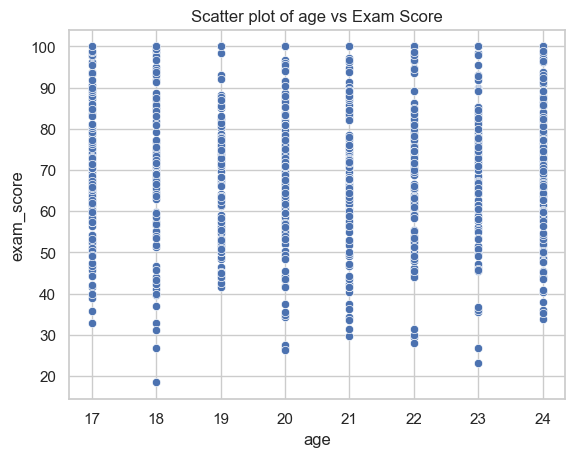

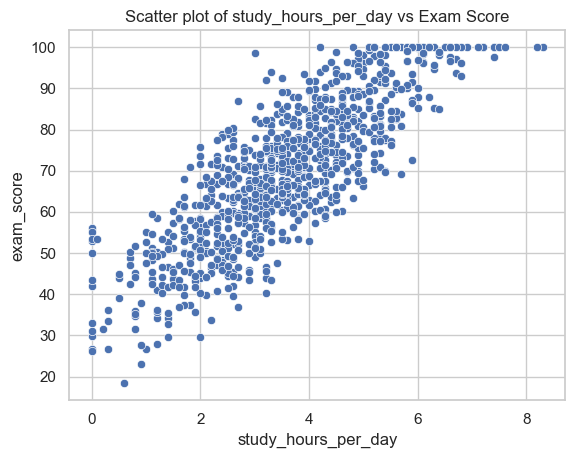

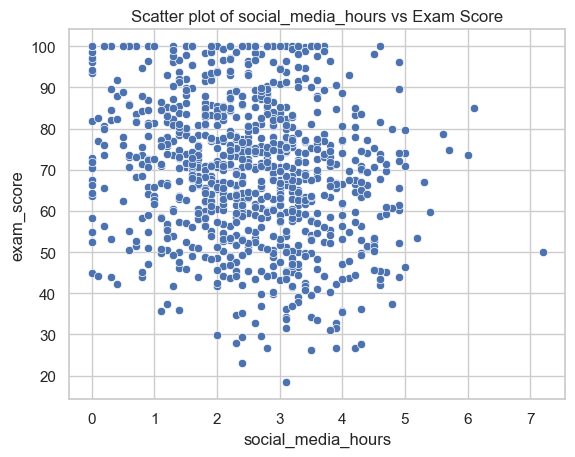

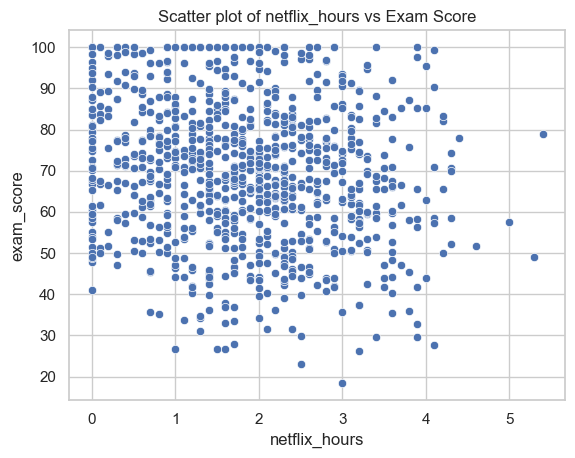

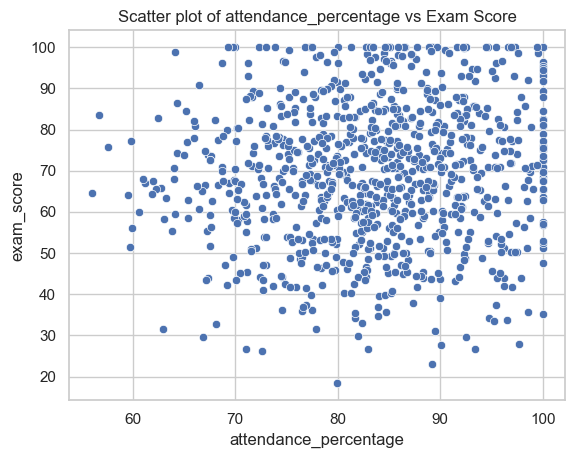

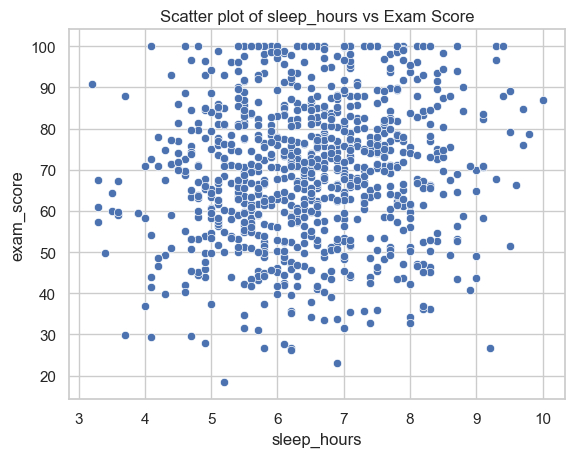

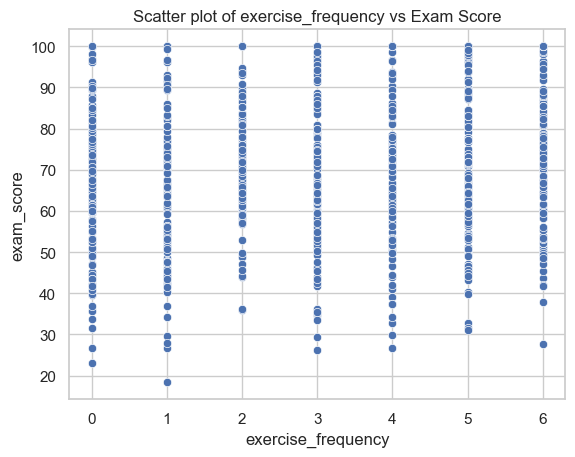

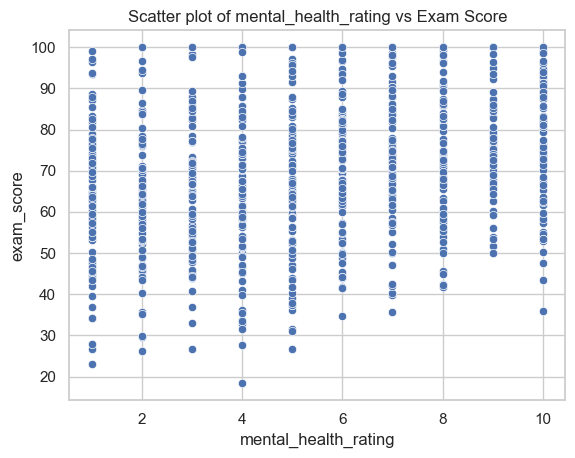

In [86]:
for features in num_features:
    sns.scatterplot(data=df,x=features,y='exam_score')
    plt.title(f'Scatter plot of {features} vs Exam Score')
    plt.show()

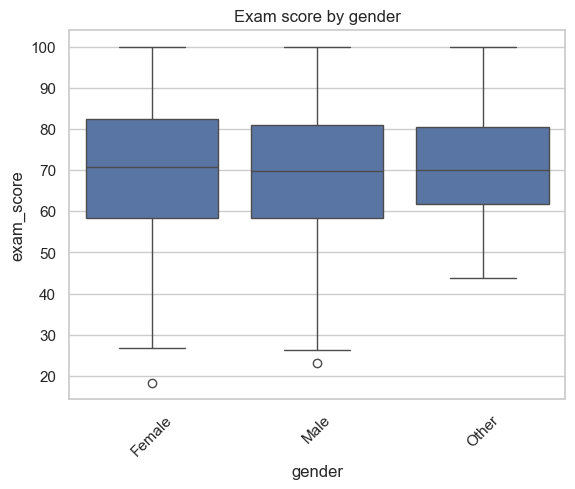

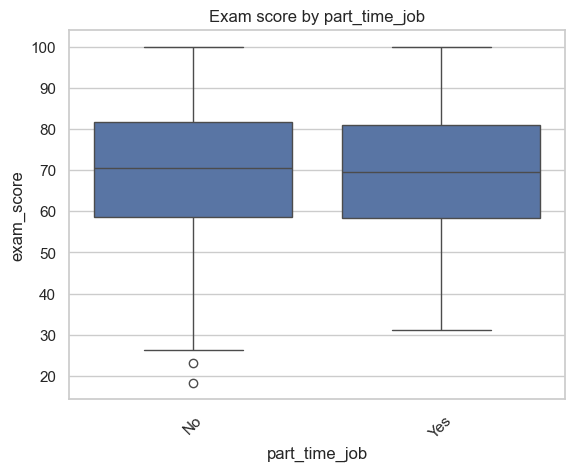

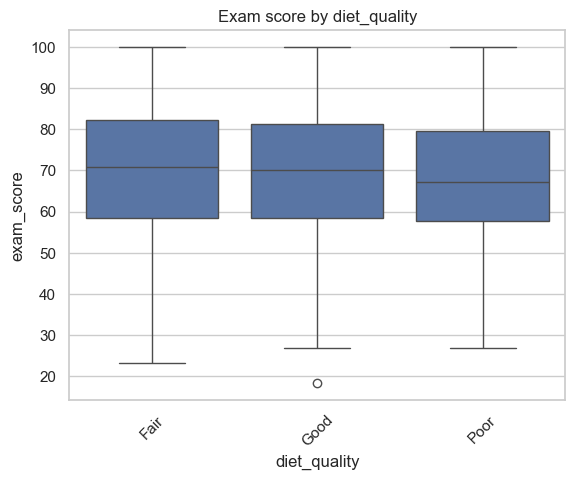

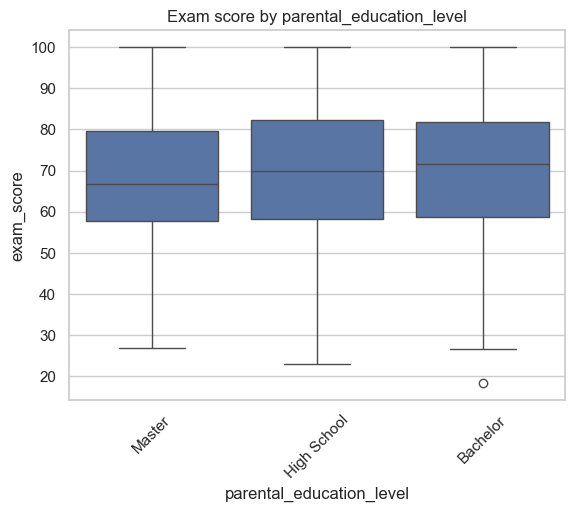

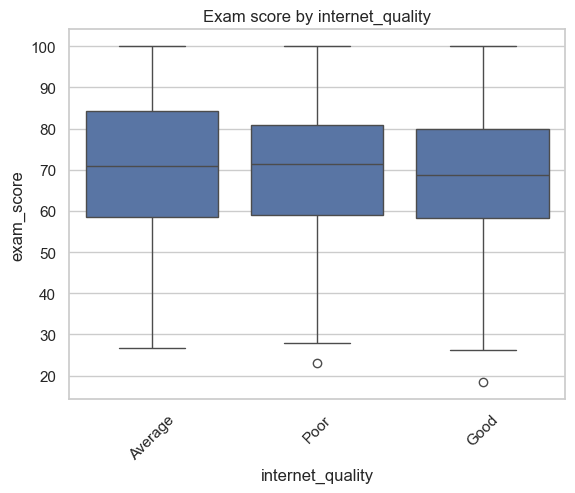

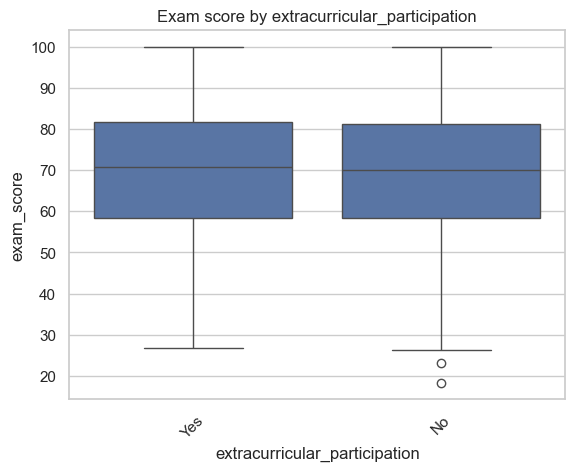

In [87]:
for col in categorical_cols:
    sns.boxplot(data=df,x=col,y='exam_score')
    plt.title(f'Exam score by {col}')
    plt.xticks(rotation=45)
    plt.show()

In [88]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [89]:
df.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [90]:
features = ['study_hours_per_day','attendance_percentage','sleep_hours', 'mental_health_rating','part_time_job']
target = 'exam_score'

In [91]:
df_model = df[features + [target]].copy()


In [92]:
display(df_model)

,study_hours_per_day,attendance_percentage,sleep_hours,mental_health_rating,part_time_job,exam_score
0,0.0,85.0,8.0,8,No,56.2
1,6.9,97.3,4.6,8,No,100.0
2,1.4,94.8,8.0,1,No,34.3
3,1.0,71.0,9.2,1,No,26.8
4,5.0,90.9,4.9,1,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,7.5,6,No,76.1
996,2.9,86.0,6.8,6,Yes,65.9
997,3.0,61.9,6.5,9,No,64.4
998,5.4,100.0,7.6,1,Yes,69.7


In [93]:
lab = LabelEncoder()
df_model['part_time_job'] = lab.fit_transform(df_model['part_time_job'])
df_model.head(5)

,study_hours_per_day,attendance_percentage,sleep_hours,mental_health_rating,part_time_job,exam_score
0,0.0,85.0,8.0,8,0,56.2
1,6.9,97.3,4.6,8,0,100.0
2,1.4,94.8,8.0,1,0,34.3
3,1.0,71.0,9.2,1,0,26.8
4,5.0,90.9,4.9,1,0,66.4


In [94]:
from pathlib import Path

# Dossier cible de sauvegarde
out_dir = Path("data/processed")
out_dir.mkdir(parents=True, exist_ok=True)

# Sauvegarde en CSV + Parquet
df_model.to_csv(out_dir / "df_model.csv", index=False, encoding="utf-8")
df_model.to_parquet(out_dir / "df_model.parquet", index=False)

print(f"Sauvegardé dans: {out_dir.resolve()}")


Sauvegardé dans: C:\stutent_exam_score_predict\notebooks\data\processed


In [95]:
X= df_model[features]
y = df_model[target]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
len(X_train), len(X_test), len(y_train), len(y_test)

(727, 182, 727, 182)

In [98]:
model = {
    'linearRegression':{
        'model': LinearRegression(),
        'params':{}
    },
    'decisionTreeRegressor':{
        'model': DecisionTreeRegressor(),
        'params':{'max_depth': [3,5,10], 'min_samples_split': [3,5]}
    },
    'randomForestRegressor':{
        'model': RandomForestRegressor(),
        'params':{'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
    }
}

In [99]:
best_models = []

In [100]:
for name, config in model.items():
    print(f'training{name}')
    
    grid = GridSearchCV(config['model'],config['params'], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train,y_train)
    
    y_pred = grid.predict(X_test)
    rmse =np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    
    best_models.append({
        'model': name,
        'rmse': rmse,
        'r2': r2
    })

traininglinearRegression
trainingdecisionTreeRegressor
trainingrandomForestRegressor


In [101]:
best_models

[{'model': 'linearRegression',
  'rmse': np.float64(7.190938467188638),
  'r2': 0.8094940996264433},
 {'model': 'decisionTreeRegressor',
  'rmse': np.float64(7.989825952239765),
  'r2': 0.7648137518575892},
 {'model': 'randomForestRegressor',
  'rmse': np.float64(7.221713467441814),
  'r2': 0.807859997293775}]

In [102]:
results_df = pd.DataFrame(best_models).sort_values(by='rmse')

In [103]:
results_df

,model,rmse,r2
0,linearRegression,7.190938,0.809494
2,randomForestRegressor,7.221713,0.807860
1,decisionTreeRegressor,7.989826,0.764814


In [104]:
import joblib

best_rows = results_df.sort_values(by='rmse').iloc[0]

In [105]:
best_rows

model    linearRegression
rmse             7.190938
r2               0.809494
Name: 0, dtype: object

In [106]:
best_model_name = best_rows['model']

In [107]:
best_model_name

'linearRegression'

In [108]:
best_model_config = model[best_model_name]

In [109]:
best_model_config 

{'model': LinearRegression(), 'params': {}}

In [110]:
final_model = best_model_config['model']

In [111]:
final_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [112]:
joblib.dump(final_model, 'best_model.pkl')

['best_model.pkl']

In [113]:
joblib.load('best_model.pkl').predict(X_test)

array([ 56.6125347 ,  50.42847388,  68.01649762,  74.59529628,
        85.98146352,  63.08078629,  80.04701348,  89.92801771,
        62.76704043,  71.53075848,  54.77872093,  83.1293514 ,
        55.50712337,  56.84795774,  83.44386551,  76.90551635,
        50.09576014,  90.10938622,  83.16135013,  72.9566029 ,
        80.61992577,  91.69729711,  49.28725829,  67.56464235,
        81.74485353,  58.60039915, 102.62470515,  74.41638106,
        61.46176878,  91.82549796,  56.40314637,  81.34776381,
        57.45595147,  64.13092859,  64.48227953,  68.37208385,
        89.69195799,  45.77718556,  62.717919  ,  78.07562614,
        61.85054984,  79.30877704,  70.5947591 ,  66.55221819,
        86.1259658 ,  68.67625259,  54.69003354, 107.4516993 ,
        74.5771561 ,  78.93711347,  59.86149389,  43.87777281,
        58.28779096,  73.79670885,  70.10700083, 102.67076152,
        78.71971636,  63.8141856 ,  76.46225033,  48.67665262,
        82.47701204,  71.17203049,  60.51626214,  74.64